In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import os
# os.chdir("/capstor/scratch/cscs/ajayaraj/qtpyt-tests/pentadienyl/")

In [16]:
data_folder = "./output/lowdin"
dmft_data_folder = "./output/lowdin/beta_1000/dmft_arxiv/eta_0.001/no_spin/nsites_5/adjust_mu_True"
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
dmft_sigma_file = f"{dmft_data_folder}/dmft_sigma.npy"

(7, 20000)
(20000,)


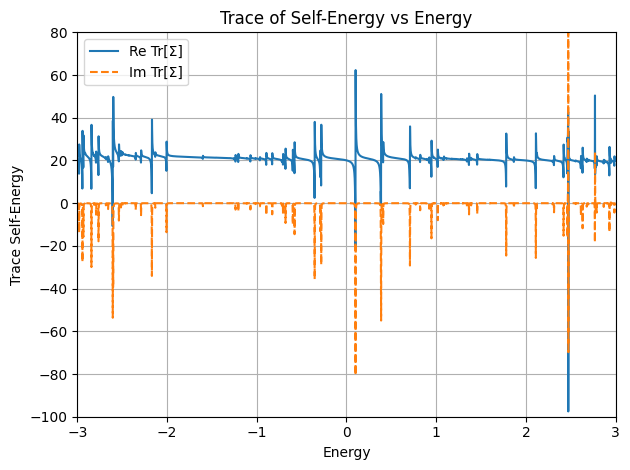

In [72]:
angelo_dmft_self_energy = np.load("Angelo_dmft/self.npy")
angelo_energy = np.load("Angelo_dmft/energies.npy")
print(angelo_dmft_self_energy.shape)
print(angelo_energy.shape)

trace_self_energy = np.sum(angelo_dmft_self_energy, axis=0)  # shape (20000,)

# Plot trace vs energy
plt.plot(angelo_energy, trace_self_energy.real, label='Re Tr[Σ]')
plt.plot(angelo_energy, trace_self_energy.imag, label='Im Tr[Σ]', linestyle='--')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy")
plt.xlim(-3, 3.0)
plt.ylim(-100,80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# Filter to -3 to 3
mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_energies = angelo_energy[mask]
filtered_self_energy = angelo_dmft_self_energy[:, mask]

# # Subsample to ~600 points
# target_points = 600
# step = max(1, len(filtered_energies) // target_points)
# subsampled_energies = filtered_energies[::step]
# subsampled_self_energy = filtered_self_energy[:, ::step]  # shape (7, 600)

# Transpose to shape (600, 7) to work per energy point
subsampled_self_energy_T = filtered_self_energy.T  # shape (600, 7)

# Create diagonal matrices: shape (600, 7, 7)
self_energy_matrices = np.array([np.diag(vec) for vec in subsampled_self_energy_T])

print(self_energy_matrices.shape)  # should be (600, 7, 7)

mu = 2.79
self_energy_matrices[:, range(7), range(7)] -= mu

np.save("Angelo_dmft/subsampled_self_energy_mu_removed.npy", self_energy_matrices)
np.save("Angelo_dmft/subsampled_energies.npy", filtered_energies)

(12000, 7, 7)


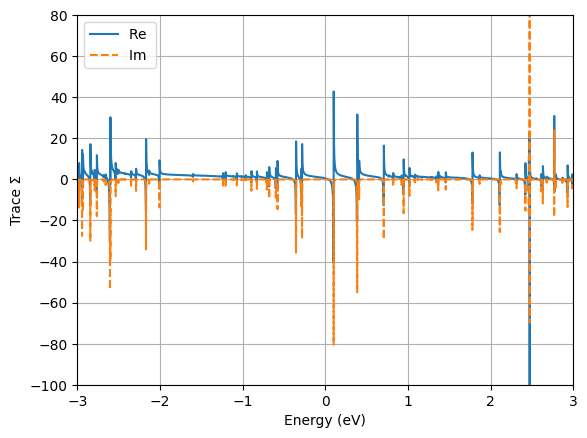

In [97]:
trace_self_energy = np.trace(self_energy_matrices , axis1=1, axis2=2)
plt.plot(filtered_energies, trace_self_energy.real,label='Re ')
plt.plot(filtered_energies, trace_self_energy.imag, '--', label='Im ')
plt.xlabel('Energy (eV)')
plt.ylabel('Trace Σ')
plt.xlim(-3,3)
plt.ylim(-100, 80)
plt.grid(True)
plt.legend()

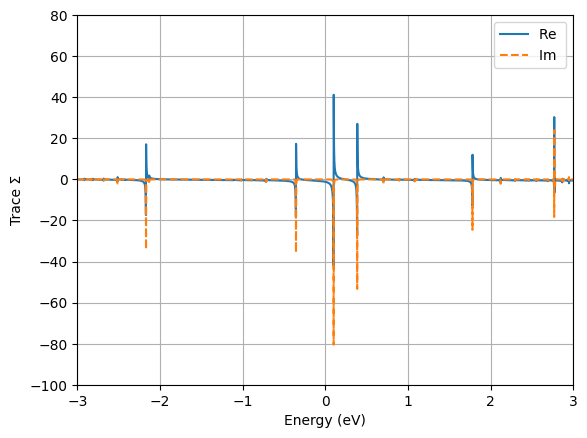

In [110]:
plt.plot(filtered_energies, self_energy_matrices[:,3,3].real,label='Re ')
plt.plot(filtered_energies, self_energy_matrices[:,3,3].imag, '--', label='Im ')
plt.xlabel('Energy (eV)')
plt.ylabel('Trace Σ')
plt.xlim(-3,3)
plt.ylim(-100, 80)
plt.grid(True)
plt.legend()

Text(0, 0.5, 'Transmission')

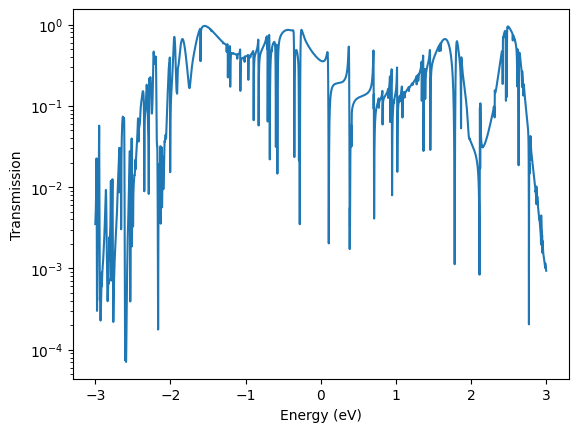

In [ ]:
E_unshifted,T_unshifted = np.load("Angelo_dmft/dmft_transmission.npy")
plt.plot(E_unshifted, T_unshifted, label='DMFT unshifted')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
# plt.xlim(-0.5,1)
# plt.ylim(1e-3,1)
#

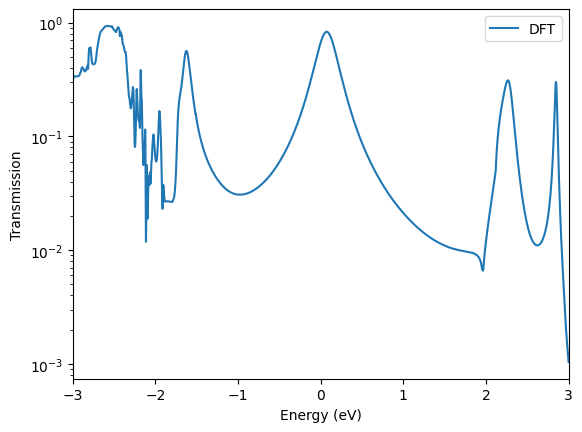

In [3]:
E,T = np.load("Angelo_dmft/dmft_transmission_mu_removed.npy")
E_dft,T_dft = np.load("Angelo_dmft/dft_transmission.npy")
E_unshifted,T_unshifted = np.load("Angelo_dmft/dmft_transmission.npy")
plt.plot(E_dft, T_dft, label='DFT')
# plt.plot(E_unshifted, T_unshifted, label='DMFT')
# plt.plot(E, T, label='DMFT')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.xlim(-3,3)
plt.legend()


(0.0005, 1)

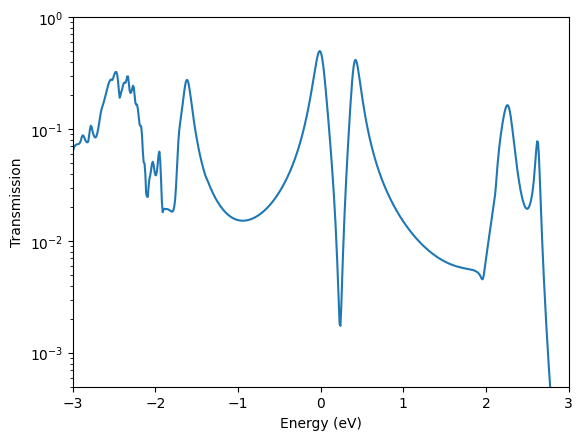

In [8]:
E_ref, T_ref = np.load("./reference/ET_dmft.npy")

plt.plot(E_ref, T_ref, label='DFT')
plt.yscale('log')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.xlim(-3,3)
plt.ylim(5e-4,1)
# plt.legend()

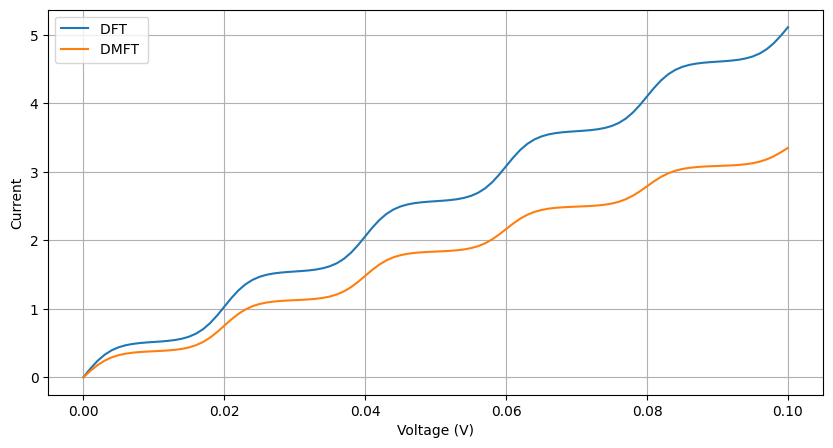

In [13]:
V_dft, I_dft = np.load("./output/lowdin/beta_1000/DFT_IV.npy")
V_dmft, I_dmft = np.load("./output/lowdin/beta_1000/DMFT_IV.npy")
V_dmft_ref, I_dmft_ref = np.load("./output/lowdin/beta_1000/Reference_DMFT_IV.npy")
plt.figure(figsize=(10, 5))
plt.plot(V_dft, I_dft, label='DFT ')
# plt.plot(I_dmft, V_dmft, label='DMFT ')
plt.plot(V_dmft_ref, I_dmft_ref, label='DMFT ')
plt.ylabel('Current')
plt.xlabel('Voltage (V)')
plt.legend()
plt.grid(True)